In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass


In [2]:
# Create a COM of object for MW Disk Using Code from Assignment 4
# using highest res files
# modified CenterOfMass so that it doesn't return rounded values
COMD = CenterOfMass("MW_HR_000.txt",2)

In [3]:
# Compute COM of MW using disk particles
COMP = COMD.COM_P(0.1,4.0)

In [4]:
# Determine positions and velocities of disk particles relative to COM motion
xD = COMD.x - float(COMP[0]/u.kpc)
yD = COMD.y - float(COMP[1]/u.kpc)
zD = COMD.z - float(COMP[2]/u.kpc)

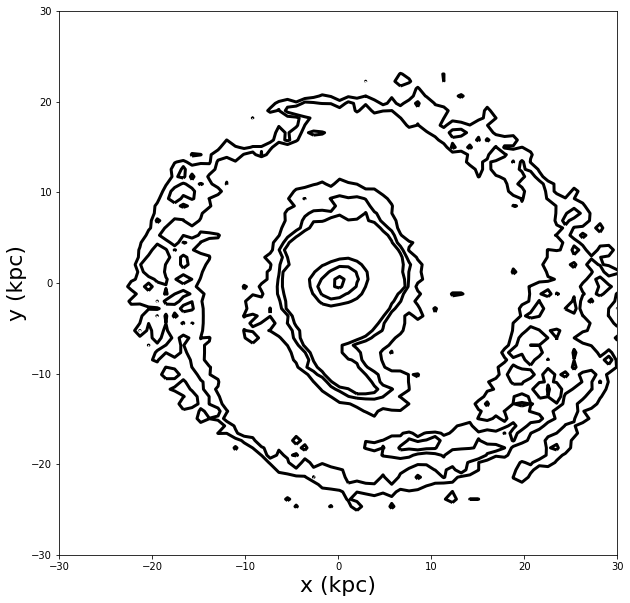

In [5]:
# Template Image 

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# calculate the 2D density of the data given
counts,xbins,ybins=np.histogram2d(xD,yD,bins=100,normed=LogNorm())

# set contour levels that you choose
# Q1 : Add more here ! 

mylevels=[5e-5,1e-4,5e-4,8e-4,1e-3,5e-3,0.01,0.05]


# make the contour plot
plt.contour(counts.transpose(),mylevels,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3,colors='black',linestyles='solid')

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#set axis limits
plt.ylim(-30,30)
plt.xlim(-30,30)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

#Save to a file
ax.set_rasterized(True)
plt.savefig('XY_Disk_Contours.eps', rasterized=True, dpi=350)

In [6]:
# Create a COM of object for MW Bulge Using Code from Assignment 4
# using highest res files

COMB = CenterOfMass("MW_HR_000.txt",3)

In [7]:
# Compute COM of MW using bulge particles
COMPB = COMB.COM_P(0.1,2.0)

In [8]:
# Determine positions and velocities of disk particles relative to COM motion
xB = COMB.x - float(COMPB[0]/u.kpc)
yB = COMB.y - float(COMPB[1]/u.kpc)-0.2 # Note i made an adjustment in position
zB = COMB.z - float(COMPB[2]/u.kpc)

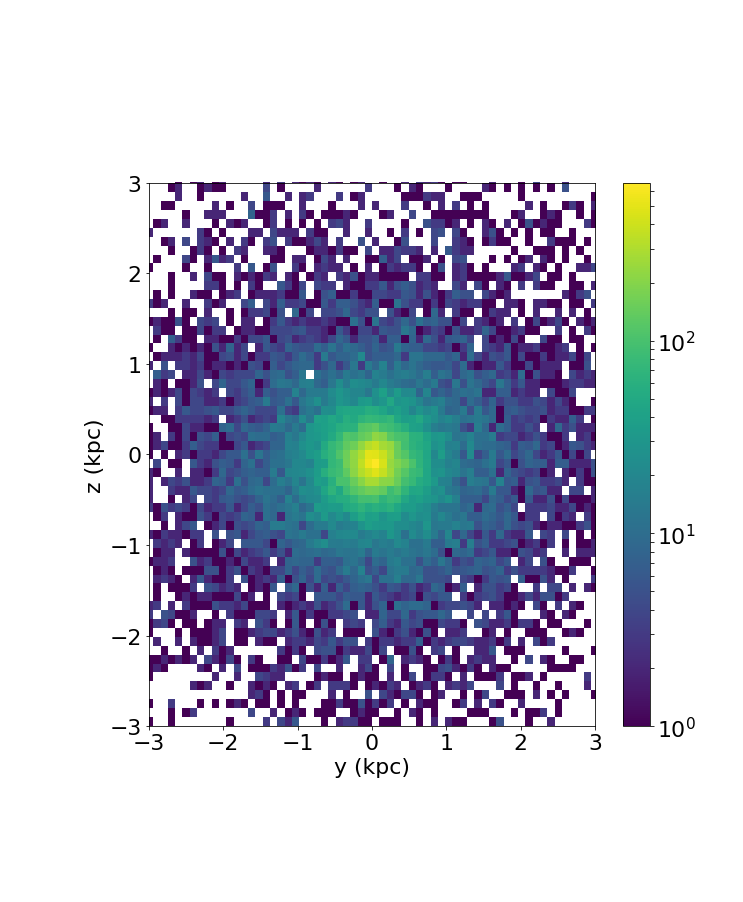

In [9]:
# Bulge Density Plot

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

rB = np.sqrt(xB**2 + yB**2 + zB**2)
index =  np.where(rB < 5)
plt.hist2d(yB[index], zB[index], bins=100, norm=LogNorm())
plt.colorbar()

#axis labels
plt.xlabel('y (kpc)', fontsize=22)
plt.ylabel('z (kpc)', fontsize=22)

#set axis limits
plt.ylim(-3,3)
plt.xlim(-3,3)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

#Save to a file
ax.set_rasterized(True)
plt.savefig('YZ_Bulge.eps', rasterized=True, dpi=350)

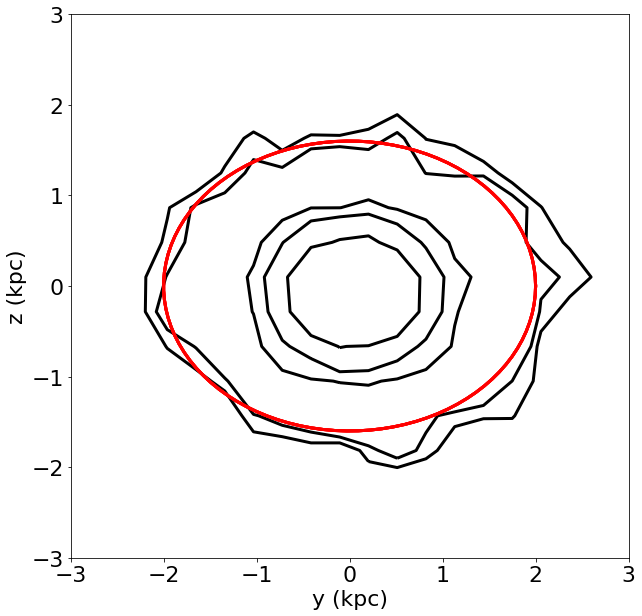

In [11]:
# BULGE CONTOUR PLOT

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# calculate the 2D density of the data given
counts,xbins,ybins=np.histogram2d(yB,zB,bins=5000,normed=LogNorm())

# max and min contour levels are set here
# add more contours by adding more numbers within this interval
mylevels=[8e-3,0.01,0.03,0.05,0.1]


# make the contour plot
plt.contour(counts.transpose(),mylevels,extent=[xbins.min(),xbins.max(),
                                                ybins.min(),ybins.max()],
            linewidths=3,colors='black',linestyles='solid')


# Part 3: First Guess at axial ratio (A and B) - start with a circle.
# Part 4: Change the axial ratio by changing just A or just B.
B = 0.8
A = 1.0
xx = np.linspace(0,2*np.pi, 100)  # 


Radius = 2.0
# plot an ellipsoid with axial ratio  A and B and Radius
Radius = 0.8  # set radius of the ellipsoid
plt.plot(A*Radius*np.cos(xx), B*Radius*np.sin(xx),'r', linewidth=3 )
Radius = 1.0
plt.plot(A*Radius*np.cos(xx), B*Radius*np.sin(xx),'r', linewidth=3 )
Radius = 1.3
plt.plot(A*Radius*np.cos(xx), B*Radius*np.sin(xx),'r', linewidth=3 )

plt.plot(A*Radius*np.cos(xx), B*Radius*np.sin(xx),'r', linewidth=3 )



# Add axis labels
plt.xlabel('y (kpc)', fontsize=22)
plt.ylabel('z (kpc)', fontsize=22)

#set axis limits
plt.ylim(-3,3)
plt.xlim(-3,3)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

#Save to a file
ax.set_rasterized(True)
plt.savefig('YZ_Bulge_Contours.eps', rasterized=True, dpi=350)